In [ ]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 10 x 10 Fold Cross Validation

In [ ]:
def CV_10X10_Fold_wo_Pruning(X, Y):
    
    CV = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 1)

    Gini = DecisionTreeClassifier(criterion = 'gini')
    gini_acc = cross_val_score(Gini, X, Y, scoring='accuracy', cv=CV, n_jobs = -1)
    
    Entropy = DecisionTreeClassifier(criterion = 'entropy')
    entropy_acc = cross_val_score(Entropy, X, Y, scoring='accuracy', cv=CV, n_jobs = -1)
    
    return(gini_acc, entropy_acc)  

In [ ]:
def CV_10X10_Fold_with_Pruning(X, Y):
    
    CV = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 1)

    Gini = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.015)
    gini_acc = cross_val_score(Gini, X, Y, scoring='accuracy', cv=CV, n_jobs = -1)
    
    Entropy = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.015)
    entropy_acc = cross_val_score(Entropy, X, Y, scoring='accuracy', cv=CV, n_jobs = -1)
    
    return(gini_acc, entropy_acc)

# Holdout Approach repeated 100 times

In [ ]:
def CV_Holdout_100_times_wo_Pruning(X, Y):
    
    CV = StratifiedShuffleSplit(n_splits = 100, test_size = 0.3, random_state = 0)

    Gini = DecisionTreeClassifier(criterion = 'gini')
    gini_acc = cross_val_score(Gini, X, Y, scoring='accuracy', cv=CV, n_jobs = -1)
    
    Entropy = DecisionTreeClassifier(criterion = 'entropy')
    entropy_acc = cross_val_score(Entropy, X, Y, scoring='accuracy', cv=CV, n_jobs = -1)
    
    return(gini_acc, entropy_acc)

In [ ]:
def CV_Holdout_100_times_with_Pruning(X, Y):
    
    CV = StratifiedShuffleSplit(n_splits = 100, test_size = 0.3, random_state = 0)
    
    Gini = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.015)
    gini_acc = cross_val_score(Gini, X, Y, scoring='accuracy', cv=CV, n_jobs = -1)
    
    Entropy = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.015)
    entropy_acc = cross_val_score(Entropy, X, Y, scoring='accuracy', cv=CV, n_jobs = -1)
    
    return(gini_acc, entropy_acc)

# Display Result Method

In [ ]:
def display_result(cv_method, dt_method, score):
    print(cv_method, " using ", dt_method)
    print('Accuracy: ', np.mean(score), ' Standard Deviation: ', np.std(score))

# Dataset 1: DryBeanDataset.csv

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Dataset/1. DryBeanDataset.csv")

X = data1[data1.columns[:-1]]
Y = data1[data1.columns[-1:]]

data1.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
gini_acc1, entropy_acc1 = CV_10X10_Fold_wo_Pruning(X, Y)
gini_acc2, entropy_acc2 = CV_10X10_Fold_with_Pruning(X, Y)
gini_acc3, entropy_acc3 = CV_Holdout_100_times_wo_Pruning(X, Y)
gini_acc4, entropy_acc4 = CV_Holdout_100_times_with_Pruning(X, Y)

display_result("\n10 X 10 Fold with out Pruning", "Gini Index", gini_acc1)
display_result("\n10 X 10 Fold with out Pruning", "Entropy Measure", entropy_acc1)

display_result("\n10 X 10 Fold with Pruning", "Gini Index", gini_acc2)
display_result("\n10 X 10 Fold with Pruning", "Entropy Measure", entropy_acc2)

display_result("\n70% Holdout repeated 100 times with out Pruning", "Gini Index", gini_acc3)
display_result("\n70% Holdout repeated 100 times with out Pruning", "Entropy Measure", entropy_acc3)

display_result("\n70% Holdout repeated 100 times with Pruning", "Gini Index", gini_acc4)
display_result("\n70% Holdout repeated 100 times with Pruning", "Entropy Measure", entropy_acc4)


10 X 10 Fold with out Pruning  using  Gini Index
Accuracy:  0.8944528187682677  Standard Deviation:  0.009445529749658637

10 X 10 Fold with out Pruning  using  Entropy Measure
Accuracy:  0.8980678994563257  Standard Deviation:  0.007572198476024832

10 X 10 Fold with Pruning  using  Gini Index
Accuracy:  0.8753948573703582  Standard Deviation:  0.00989714779529029

10 X 10 Fold with Pruning  using  Entropy Measure
Accuracy:  0.8757473611978756  Standard Deviation:  0.009251308617998681

70% Holdout repeated 100 times with out Pruning  using  Gini Index
Accuracy:  0.8934035259549461  Standard Deviation:  0.004141100859702494

70% Holdout repeated 100 times with out Pruning  using  Entropy Measure
Accuracy:  0.8953379040156707  Standard Deviation:  0.004182174338883448

70% Holdout repeated 100 times with Pruning  using  Gini Index
Accuracy:  0.8741993143976495  Standard Deviation:  0.005668116412807527

70% Holdout repeated 100 times with Pruning  using  Entropy Measure
Accuracy:  0.8

# Dataset 2: AuditRisk.csv

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/Dataset/2. AuditRisk.csv")
data2.drop('LOCATION_ID', axis = 1, inplace = True)

for i in data2.columns:
    data2[i] = np.nan_to_num(data2[i].astype(np.float32))

X = data2[data2.columns[:-1]]
Y = data2[data2.columns[-1:]]

data2.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2.0,0.2,0.4,0.0,0.2,0.0,2.4,8.574000,0.4,0.5,1.7148,1.0
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2.0,0.2,0.4,0.0,0.2,0.0,2.0,2.554000,0.4,0.5,0.5108,0.0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.548000,0.4,0.5,0.3096,0.0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2.0,0.2,0.4,0.0,0.2,0.0,4.4,17.530001,0.4,0.5,3.5060,1.0
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.416000,0.4,0.5,0.2832,0.0


In [ ]:
gini_acc1, entropy_acc1 = CV_10X10_Fold_wo_Pruning(X, Y)
gini_acc2, entropy_acc2 = CV_10X10_Fold_with_Pruning(X, Y)
gini_acc3, entropy_acc3 = CV_Holdout_100_times_wo_Pruning(X, Y)
gini_acc4, entropy_acc4 = CV_Holdout_100_times_with_Pruning(X, Y)

display_result("\n10 X 10 Fold with out Pruning", "Gini Index", gini_acc1)
display_result("\n10 X 10 Fold with out Pruning", "Entropy Measure", entropy_acc1)

display_result("\n10 X 10 Fold with Pruning", "Gini Index", gini_acc2)
display_result("\n10 X 10 Fold with Pruning", "Entropy Measure", entropy_acc2)

display_result("\n70% Holdout repeated 100 times with out Pruning", "Gini Index", gini_acc3)
display_result("\n70% Holdout repeated 100 times with out Pruning", "Entropy Measure", entropy_acc3)

display_result("\n70% Holdout repeated 100 times with Pruning", "Gini Index", gini_acc4)
display_result("\n70% Holdout repeated 100 times with Pruning", "Entropy Measure", entropy_acc4)


10 X 10 Fold with out Pruning  using  Gini Index
Accuracy:  0.9996120546120547  Standard Deviation:  0.00220599274529136

10 X 10 Fold with out Pruning  using  Entropy Measure
Accuracy:  0.9996120546120547  Standard Deviation:  0.00220599274529136

10 X 10 Fold with Pruning  using  Gini Index
Accuracy:  0.9996120546120547  Standard Deviation:  0.00220599274529136

10 X 10 Fold with Pruning  using  Entropy Measure
Accuracy:  0.9996120546120547  Standard Deviation:  0.00220599274529136

70% Holdout repeated 100 times with out Pruning  using  Gini Index
Accuracy:  0.9996137339055794  Standard Deviation:  0.001370033450601912

70% Holdout repeated 100 times with out Pruning  using  Entropy Measure
Accuracy:  0.9996137339055794  Standard Deviation:  0.001370033450601912

70% Holdout repeated 100 times with Pruning  using  Gini Index
Accuracy:  0.9996137339055794  Standard Deviation:  0.001370033450601912

70% Holdout repeated 100 times with Pruning  using  Entropy Measure
Accuracy:  0.9996

# Dataset 3:

In [ ]:
data3 = pd.read_excel("/content/drive/MyDrive/Dataset/3. Divorce.xlsx")

X = data3[data3.columns[:-1]]
Y = data3[data3.columns[-1:]]

data3.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [ ]:
gini_acc1, entropy_acc1 = CV_10X10_Fold_wo_Pruning(X, Y)
gini_acc2, entropy_acc2 = CV_10X10_Fold_with_Pruning(X, Y)
gini_acc3, entropy_acc3 = CV_Holdout_100_times_wo_Pruning(X, Y)
gini_acc4, entropy_acc4 = CV_Holdout_100_times_with_Pruning(X, Y)

display_result("\n10 X 10 Fold with out Pruning", "Gini Index", gini_acc1)
display_result("\n10 X 10 Fold with out Pruning", "Entropy Measure", entropy_acc1)

display_result("\n10 X 10 Fold with Pruning", "Gini Index", gini_acc2)
display_result("\n10 X 10 Fold with Pruning", "Entropy Measure", entropy_acc2)

display_result("\n70% Holdout repeated 100 times with out Pruning", "Gini Index", gini_acc3)
display_result("\n70% Holdout repeated 100 times with out Pruning", "Entropy Measure", entropy_acc3)

display_result("\n70% Holdout repeated 100 times with Pruning", "Gini Index", gini_acc4)
display_result("\n70% Holdout repeated 100 times with Pruning", "Entropy Measure", entropy_acc4)


10 X 10 Fold with out Pruning  using  Gini Index
Accuracy:  0.9741176470588236  Standard Deviation:  0.04102493123332399

10 X 10 Fold with out Pruning  using  Entropy Measure
Accuracy:  0.9611764705882354  Standard Deviation:  0.04340203940163934

10 X 10 Fold with Pruning  using  Gini Index
Accuracy:  0.9723529411764705  Standard Deviation:  0.04113863808213145

10 X 10 Fold with Pruning  using  Entropy Measure
Accuracy:  0.9629411764705881  Standard Deviation:  0.042949233732404266

70% Holdout repeated 100 times with out Pruning  using  Gini Index
Accuracy:  0.9615686274509804  Standard Deviation:  0.028403637587814626

70% Holdout repeated 100 times with out Pruning  using  Entropy Measure
Accuracy:  0.9603921568627451  Standard Deviation:  0.02730774958204499

70% Holdout repeated 100 times with Pruning  using  Gini Index
Accuracy:  0.9607843137254902  Standard Deviation:  0.027729677693590103

70% Holdout repeated 100 times with Pruning  using  Entropy Measure
Accuracy:  0.9598

# Dataset 4:

In [ ]:
data4 = pd.read_csv("/content/drive/MyDrive/Dataset/4. CancerData.csv")

X = data4[data4.columns[:-1]]
Y = data4[data4.columns[-1:]]

data4.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
gini_acc1, entropy_acc1 = CV_10X10_Fold_wo_Pruning(X, Y)
gini_acc2, entropy_acc2 = CV_10X10_Fold_with_Pruning(X, Y)
gini_acc3, entropy_acc3 = CV_Holdout_100_times_wo_Pruning(X, Y)
gini_acc4, entropy_acc4 = CV_Holdout_100_times_with_Pruning(X, Y)

display_result("\n10 X 10 Fold with out Pruning", "Gini Index", gini_acc1)
display_result("\n10 X 10 Fold with out Pruning", "Entropy Measure", entropy_acc1)

display_result("\n10 X 10 Fold with Pruning", "Gini Index", gini_acc2)
display_result("\n10 X 10 Fold with Pruning", "Entropy Measure", entropy_acc2)

display_result("\n70% Holdout repeated 100 times with out Pruning", "Gini Index", gini_acc3)
display_result("\n70% Holdout repeated 100 times with out Pruning", "Entropy Measure", entropy_acc3)

display_result("\n70% Holdout repeated 100 times with Pruning", "Gini Index", gini_acc4)
display_result("\n70% Holdout repeated 100 times with Pruning", "Entropy Measure", entropy_acc4)


10 X 10 Fold with out Pruning  using  Gini Index
Accuracy:  0.7231818181818183  Standard Deviation:  0.13778060107003928

10 X 10 Fold with out Pruning  using  Entropy Measure
Accuracy:  0.6993939393939393  Standard Deviation:  0.14807798307832135

10 X 10 Fold with Pruning  using  Gini Index
Accuracy:  0.731969696969697  Standard Deviation:  0.13749438589423724

10 X 10 Fold with Pruning  using  Entropy Measure
Accuracy:  0.6947727272727273  Standard Deviation:  0.1444142684980326

70% Holdout repeated 100 times with out Pruning  using  Gini Index
Accuracy:  0.6960000000000001  Standard Deviation:  0.08949016591736977

70% Holdout repeated 100 times with out Pruning  using  Entropy Measure
Accuracy:  0.7017142857142856  Standard Deviation:  0.0814481179547284

70% Holdout repeated 100 times with Pruning  using  Gini Index
Accuracy:  0.6971428571428571  Standard Deviation:  0.08349508112115692

70% Holdout repeated 100 times with Pruning  using  Entropy Measure
Accuracy:  0.6974285714

# Dataset 5: Dermatology.data

In [ ]:
labels = ['Feature ' + str(i) for i in range(33)]
labels.append('Class')

data5 = pd.read_csv("/content/drive/MyDrive/Dataset/5. Dermatology.data", header=None, names= labels)
data5.drop('Feature 32', axis=1, inplace=True)

X = data5[data5.columns[:-1]]
Y = data5[data5.columns[-1:]]

data5.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Class
2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,2
3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,1
2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,3
2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,1
2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,3


In [ ]:
gini_acc1, entropy_acc1 = CV_10X10_Fold_wo_Pruning(X, Y)
gini_acc2, entropy_acc2 = CV_10X10_Fold_with_Pruning(X, Y)
gini_acc3, entropy_acc3 = CV_Holdout_100_times_wo_Pruning(X, Y)
gini_acc4, entropy_acc4 = CV_Holdout_100_times_with_Pruning(X, Y)

display_result("\n10 X 10 Fold with out Pruning", "Gini Index", gini_acc1)
display_result("\n10 X 10 Fold with out Pruning", "Entropy Measure", entropy_acc1)

display_result("\n10 X 10 Fold with Pruning", "Gini Index", gini_acc2)
display_result("\n10 X 10 Fold with Pruning", "Entropy Measure", entropy_acc2)

display_result("\n70% Holdout repeated 100 times with out Pruning", "Gini Index", gini_acc3)
display_result("\n70% Holdout repeated 100 times with out Pruning", "Entropy Measure", entropy_acc3)

display_result("\n70% Holdout repeated 100 times with Pruning", "Gini Index", gini_acc4)
display_result("\n70% Holdout repeated 100 times with Pruning", "Entropy Measure", entropy_acc4)


10 X 10 Fold with out Pruning  using  Gini Index
Accuracy:  0.9407057057057058  Standard Deviation:  0.03567337848136362

10 X 10 Fold with out Pruning  using  Entropy Measure
Accuracy:  0.9453903903903905  Standard Deviation:  0.03344299589622699

10 X 10 Fold with Pruning  using  Gini Index
Accuracy:  0.9456456456456458  Standard Deviation:  0.03559967916957675

10 X 10 Fold with Pruning  using  Entropy Measure
Accuracy:  0.9584834834834836  Standard Deviation:  0.030595188675257085

70% Holdout repeated 100 times with out Pruning  using  Gini Index
Accuracy:  0.9461818181818181  Standard Deviation:  0.016648033661468515

70% Holdout repeated 100 times with out Pruning  using  Entropy Measure
Accuracy:  0.9479090909090909  Standard Deviation:  0.0188449524118518

70% Holdout repeated 100 times with Pruning  using  Gini Index
Accuracy:  0.947818181818182  Standard Deviation:  0.01583071603712018

70% Holdout repeated 100 times with Pruning  using  Entropy Measure
Accuracy:  0.9560000

# Results

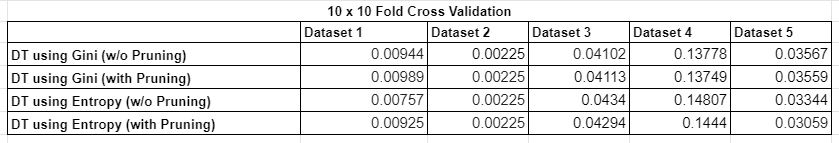

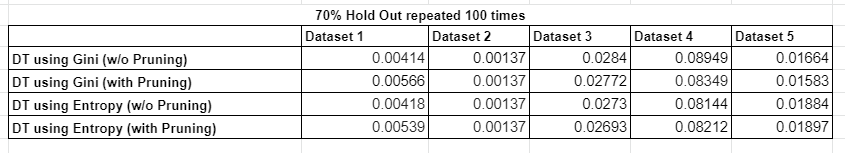

# Advantages of Hold Out Approach

*   It is a stratefied approach used to avoid biasness.
*   This approach is good for generalization problems.

# Disadvantages of Hold Out Approach

*   In holdout approach every point is neither a part of training nor a part of testing.



# Advantages of K-Fold Cross Validation Approach

*   K-Fold cv is a solution for making every point a part of training and every point a part of testing.

# Disadvantages of K-Fold Cross Validation Approach

*   Here problem is selecting combination of testing or training sets.

